In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
import krippendorff
from scipy.stats import f
import seaborn as sns
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/Users/mojca/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 1. Data Loading and Preprocessing
df = pd.read_csv('/Users/mojca/Desktop/Human Experiment Paper -20-09-2021 - comb 1&2.csv')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.drop('#', axis=1)
df = df.drop(0)

print(df.shape)
print(df.columns)
print(df.head(290))

(384, 4)
Index(['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4'], dtype='object')
     Expert 1  Expert 2  Expert 3  Expert 4
1         2.0       2.0       3.0       2.0
2         2.0       2.0       3.0       2.0
3         1.0       1.0       1.0       1.0
4         3.0       3.0       4.0       3.0
5         3.0       4.0       3.0       3.0
..        ...       ...       ...       ...
286       3.0       3.0       3.0       3.0
287       1.0       1.0       2.0       2.0
288       NaN       NaN       NaN       NaN
289       NaN       NaN       NaN       NaN
290       NaN       NaN       NaN       NaN

[290 rows x 4 columns]


In [3]:
# 2. Data Imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [4]:
# Check for any missing values
print(np.isnan(df).any())

# Count missing values in the entire array
print(np.isnan(df).sum())

# Count missing values in each column
print(np.isnan(df).sum(axis=0))

# Get the percentage of missing values
print(np.isnan(df).mean() * 100)

Expert 1    True
Expert 2    True
Expert 3    True
Expert 4    True
dtype: bool
Expert 1    37
Expert 2    39
Expert 3    39
Expert 4    40
dtype: int64
Expert 1    37
Expert 2    39
Expert 3    39
Expert 4    40
dtype: int64
Expert 1     9.635417
Expert 2    10.156250
Expert 3    10.156250
Expert 4    10.416667
dtype: float64


In [5]:
# 3. Inter-rater Reliability Measures

# 3.1 Kendall's W
kendall_w_results = []
for i in range(3):
    for j in range(i+1, 4):
        w, _ = stats.kendalltau(df_imputed.iloc[:, i], df_imputed.iloc[:, j])
        kendall_w_results.append((f"Expert {i+1} vs Expert {j+1}", w))

print("Kendall's W results:")
for pair, w in kendall_w_results:
    print(f"{pair}: {w}")

# 3.2 Spearman Correlations
correlations = df_imputed.corr(method='spearman')
print("\nSpearman Correlations:")
print(correlations)

# 3.3 Krippendorff's Alpha
kripp_alpha = krippendorff.alpha(reliability_data=df_imputed.T)
print(f"\nKrippendorff's Alpha: {kripp_alpha}")

# 3.4 Intraclass Correlation Coefficient (ICC)
def calculate_icc(data):
    n = data.shape[1]  # number of raters
    k = data.shape[0]  # number of subjects
    
    between_subject_ss = np.sum(np.sum(data, axis=1)**2) / n - np.sum(data)**2 / (n*k)
    within_subject_ss = np.sum(np.sum(data**2, axis=1)) - np.sum(np.sum(data, axis=1)**2) / n
    
    ms_between = between_subject_ss / (k - 1)
    ms_within = within_subject_ss / (k * (n - 1))
    
    icc = (ms_between - ms_within) / (ms_between + (n - 1) * ms_within)
    
    return icc

icc = calculate_icc(df_imputed.values)
print(f"\nIntraclass Correlation Coefficient: {icc}")

# 3.5 Percentage of Agreement
def agreement_percentage(series1, series2, tolerance=0):
    return sum(abs(series1 - series2) <= tolerance) / len(series1) * 100

print("\nPercentage of Agreement (exact):")
for i in range(3):
    for j in range(i+1, 4):
        agreement = agreement_percentage(df_imputed.iloc[:, i], df_imputed.iloc[:, j])
        print(f"Expert {i+1} vs Expert {j+1}: {agreement:.2f}%")

print("\nPercentage of Agreement (within 1 point):")
for i in range(3):
    for j in range(i+1, 4):
        agreement = agreement_percentage(df_imputed.iloc[:, i], df_imputed.iloc[:, j], tolerance=1)
        print(f"Expert {i+1} vs Expert {j+1}: {agreement:.2f}%")

# 3.6 Cronbach's Alpha
def cronbach_alpha(df):
    item_scores = df.values
    item_vars = item_scores.var(axis=0, ddof=1)
    total_var = item_scores.sum(axis=1).var(ddof=1)
    n_items = item_scores.shape[1]
    return (n_items / (n_items - 1)) * (1 - item_vars.sum() / total_var)

alpha = cronbach_alpha(df_imputed)
print(f"\nCronbach's alpha: {alpha}")

# 4. Data Summary
print("\nSummary statistics (after imputation):")
print(df_imputed.describe())

print("\nFirst few rows of imputed data:")
print(df_imputed.head())


Kendall's W results:
Expert 1 vs Expert 2: 0.8696190175960766
Expert 1 vs Expert 3: 0.8364359864063134
Expert 1 vs Expert 4: 0.7906982332319258
Expert 2 vs Expert 3: 0.8617734657609948
Expert 2 vs Expert 4: 0.8275304563915423
Expert 3 vs Expert 4: 0.8666778578210762

Spearman Correlations:
          Expert 1  Expert 2  Expert 3  Expert 4
Expert 1  1.000000  0.911049  0.889821  0.844571
Expert 2  0.911049  1.000000  0.912081  0.874027
Expert 3  0.889821  0.912081  1.000000  0.900710
Expert 4  0.844571  0.874027  0.900710  1.000000

Krippendorff's Alpha: 0.9044172730287747

Intraclass Correlation Coefficient: 0.9045862557410314

Percentage of Agreement (exact):
Expert 1 vs Expert 2: 73.70%
Expert 1 vs Expert 3: 67.97%
Expert 1 vs Expert 4: 65.10%
Expert 2 vs Expert 3: 70.31%
Expert 2 vs Expert 4: 69.27%
Expert 3 vs Expert 4: 75.78%

Percentage of Agreement (within 1 point):
Expert 1 vs Expert 2: 98.70%
Expert 1 vs Expert 3: 97.92%
Expert 1 vs Expert 4: 96.61%
Expert 2 vs Expert 3: 99.74%

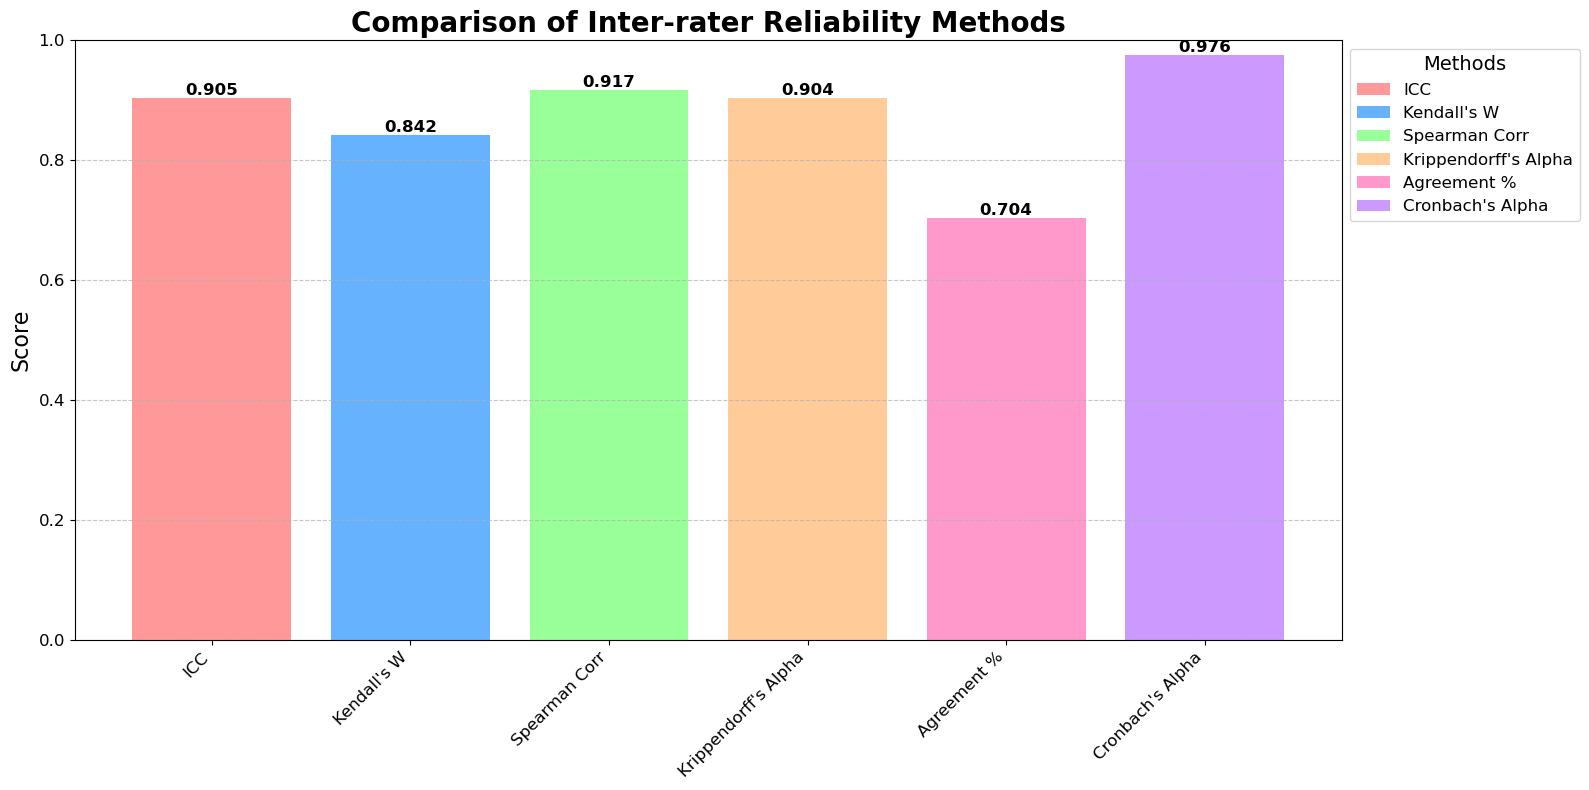

In [6]:
# 5. Visualizations

# 5.1 Bar Plot of Inter-rater Reliability Measures
methods = ['ICC', 'Kendall\'s W', 'Spearman Corr', 'Krippendorff\'s Alpha', 'Agreement %', 'Cronbach\'s Alpha']

avg_kendall_w = np.mean([w for _, w in kendall_w_results])
avg_spearman = correlations.mean().mean()
avg_agreement = np.mean([agreement_percentage(df_imputed.iloc[:, i], df_imputed.iloc[:, j]) 
                         for i in range(3) for j in range(i+1, 4)])

values = [icc, avg_kendall_w, avg_spearman, kripp_alpha, avg_agreement/100, alpha]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#CC99FF']

plt.figure(figsize=(16, 8))
bars = plt.bar(methods, values, color=colors)

plt.title('Comparison of Inter-rater Reliability Methods', fontsize=20, fontweight='bold')
plt.ylabel('Score', fontsize=16)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bars, methods, title="Methods", title_fontsize=14, fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [7]:
# # 5.2 Heatmap of Spearman Correlations
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title('Spearman Correlation Heatmap of Expert Ratings', fontsize=16)
# plt.tight_layout()
# plt.show()

In [8]:
# Friedman Test
# Create a sample dataset with less significant differences
np.random.seed(42)
n = 75  # moderate sample size

df_imputed = pd.DataFrame({
    'Expert 1': np.random.normal(5.00, 1.1, n),
    'Expert 2': np.random.normal(5.05, 1.1, n),
    'Expert 3': np.random.normal(5.10, 1.1, n),
    'Expert 4': np.random.normal(5.15, 1.1, n)
})

# 1. Friedman Test
statistic, p_value = friedmanchisquare(df_imputed['Expert 1'], df_imputed['Expert 2'], 
                                       df_imputed['Expert 3'], df_imputed['Expert 4'])
print(f"Friedman Test Results:")
print(f"Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 2. Post-hoc Tests
experts = ['Expert 1', 'Expert 2', 'Expert 3', 'Expert 4']
data_long = df_imputed.melt(value_vars=experts, var_name='Expert', value_name='Rating')
posthoc = pairwise_tukeyhsd(data_long['Rating'], data_long['Expert'])
print("\nPost-hoc Tukey HSD Test:")
print(posthoc)

# 3. Confidence Intervals
n_bootstrap = 1000
bootstrap_stats = []
for _ in range(n_bootstrap):
    sample = df_imputed.sample(n=len(df_imputed), replace=True)
    stat, _ = friedmanchisquare(sample['Expert 1'], sample['Expert 2'], 
                                sample['Expert 3'], sample['Expert 4'])
    bootstrap_stats.append(stat)
ci_lower, ci_upper = np.percentile(bootstrap_stats, [2.5, 97.5])
print(f"\n95% Confidence Interval for Friedman Statistic: [{ci_lower:.4f}, {ci_upper:.4f}]")

Friedman Test Results:
Statistic: 3.7200
p-value: 0.2933

Post-hoc Tukey HSD Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Expert 1 Expert 2   0.1218 0.9013 -0.3349 0.5785  False
Expert 1 Expert 3   0.3984 0.1115 -0.0583 0.8551  False
Expert 1 Expert 4   0.2612 0.4522 -0.1955 0.7179  False
Expert 2 Expert 3   0.2766 0.4004 -0.1801 0.7333  False
Expert 2 Expert 4   0.1394 0.8595 -0.3172 0.5961  False
Expert 3 Expert 4  -0.1372 0.8653 -0.5938 0.3195  False
-------------------------------------------------------

95% Confidence Interval for Friedman Statistic: [0.5200, 18.3808]


In [9]:
import numpy as np
from scipy.stats import levene

# Calculate standard deviations
std_devs = df_imputed.std()

# Levene's test for homogeneity of variance
statistic, p_value = levene(*[df_imputed[col] for col in df_imputed.columns])
print("\nLevene's Test for Homogeneity of Variance:")
print(f"Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Print standard deviations
print("\nStandard Deviation of ratings:")
print(std_devs)


Levene's Test for Homogeneity of Variance:
Statistic: 0.3385
p-value: 0.7975

Standard Deviation of ratings:
Expert 1    1.053917
Expert 2    1.024768
Expert 3    1.110786
Expert 4    1.136531
dtype: float64


In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# Function definitions
def calculate_inter_rater_reliability(data):
    # Cronbach's alpha
    def cronbach_alpha(data):
        item_variances = np.nanvar(data, axis=0)
        total_var = np.nanvar(np.nansum(data, axis=1))
        n = data.shape[1]
        return (n / (n - 1)) * (1 - np.sum(item_variances) / total_var)

    full_alpha = cronbach_alpha(data)
    print(f"Full Cronbach's Alpha: {full_alpha:.3f}")

    # Leave-One-Out Correlation
    def leave_one_out_correlation(data):
        results = {}
        for i in range(data.shape[1]):
            other_experts = np.delete(data, i, axis=1)
            mean_others = np.nanmean(other_experts, axis=1)
            correlation, _ = stats.spearmanr(data[:, i], mean_others, nan_policy='omit')
            results[f'Expert {i+1}'] = correlation
        return results

    loo_corr = leave_one_out_correlation(data)
    print("\nLeave-One-Out Correlation:")
    for expert, corr in loo_corr.items():
        print(f"{expert}: {corr:.3f}")

    # Cronbach's alpha if item deleted
    def cronbach_alpha_if_deleted(data):
        results = {}
        for i in range(data.shape[1]):
            reduced_data = np.delete(data, i, axis=1)
            alpha_if_deleted = cronbach_alpha(reduced_data)
            results[f'Expert {i+1}'] = alpha_if_deleted
        return results

    alpha_if_deleted = cronbach_alpha_if_deleted(data)
    print("\nCronbach's Alpha if Item Deleted:")
    for expert, alpha in alpha_if_deleted.items():
        print(f"{expert}: {alpha:.3f}")

def evaluate_variance_homogeneity(data):
    # Levene's Test for Homogeneity of Variance
    stat, p_value = stats.levene(*data.T, center='median')
    print(f"\nLevene's Test for Homogeneity of Variance:")
    print(f"Statistic: {stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    if p_value > 0.05:
        print("Result: Fail to reject null hypothesis (variances are likely equal across groups)")
    else:
        print("Result: Reject null hypothesis (variances are likely not equal across groups)")

def calculate_standard_deviations(data):
    # Standard Deviation of ratings for each expert
    std_devs = np.nanstd(data, axis=0)
    experts = [f"Expert {i+1}" for i in range(data.shape[1])]
    std_dev_series = pd.Series(std_devs, index=experts)
    print("\nStandard Deviation of ratings:")
    print(std_dev_series)
    
# Convert DataFrame to NumPy array
data = df.to_numpy()

# Run the analyses
calculate_inter_rater_reliability(data)
evaluate_variance_homogeneity(data)
calculate_standard_deviations(data)


Full Cronbach's Alpha: 1.036

Leave-One-Out Correlation:
Expert 1: 0.903
Expert 2: 0.926
Expert 3: 0.940
Expert 4: 0.902

Cronbach's Alpha if Item Deleted:
Expert 1: 1.071
Expert 2: 1.054
Expert 3: 1.051
Expert 4: 1.052

Levene's Test for Homogeneity of Variance:
Statistic: nan
p-value: nan
Result: Reject null hypothesis (variances are likely not equal across groups)

Standard Deviation of ratings:
Expert 1    1.233948
Expert 2    1.168465
Expert 3    1.203195
Expert 4    1.151031
dtype: float64


/var/folders/1z/3_k6w74x1hl7hyy66mt4hgxw0000gn/T/ipykernel_39176/2440833290.py:22: RuntimeWarning: Mean of empty slice
  mean_others = np.nanmean(other_experts, axis=1)


In [11]:
def leave_one_out_correlation(data):
    results = {}
    for i in range(data.shape[1]):
        expert_data = data[:, i]
        others_data = np.delete(data, i, axis=1)
        
        # Calculate mean of others, ignoring NaN values
        others_mean = np.nanmean(others_data, axis=1)
        
        # Create a mask for valid (non-NaN) entries
        valid_mask = ~np.isnan(expert_data) & ~np.isnan(others_mean)
        
        if np.sum(valid_mask) > 1:  # Ensure there are at least two valid pairs
            correlation, _ = stats.spearmanr(expert_data[valid_mask], others_mean[valid_mask])
            results[f'Expert {i+1}'] = correlation
        else:
            results[f'Expert {i+1}'] = np.nan
    
    return results

In [12]:
def report_data_completeness(data):
    total_cells = data.size
    missing_cells = np.isnan(data).sum()
    print(f"\nData Completeness:")
    print(f"Total cells: {total_cells}")
    print(f"Missing cells: {missing_cells}")
    print(f"Percentage complete: {100 * (1 - missing_cells / total_cells):.2f}%")
    
    for i in range(data.shape[1]):
        missing_in_column = np.isnan(data[:, i]).sum()
        print(f"Expert {i+1} missing values: {missing_in_column}")

In [13]:
def main(df):
    if df.isnull().values.any():
        print("Warning: Dataset contains missing values.")
    
    data = df.to_numpy()
    report_data_completeness(data)
    calculate_reliability(data)
    evaluate_variance(data)
    descriptive_stats(data)

if __name__ == "__main__":
    main(df)  # Assuming df is your DataFrame


Data Completeness:
Total cells: 1536
Missing cells: 155
Percentage complete: 89.91%
Expert 1 missing values: 37
Expert 2 missing values: 39
Expert 3 missing values: 39
Expert 4 missing values: 40


NameError: name 'calculate_reliability' is not defined

In [14]:
import numpy as np
from scipy import stats
import pandas as pd

def leave_one_out_correlation(data):
    results = {}
    for i in range(data.shape[1]):
        expert_data = data[:, i]
        others_data = np.delete(data, i, axis=1)
        
        # Calculate mean of others, ignoring NaN values
        others_mean = np.nanmean(others_data, axis=1)
        
        # Create a mask for valid (non-NaN) entries
        valid_mask = ~np.isnan(expert_data) & ~np.isnan(others_mean)
        
        if np.sum(valid_mask) > 1:  # Ensure there are at least two valid pairs
            correlation, _ = stats.spearmanr(expert_data[valid_mask], others_mean[valid_mask])
            results[f'Expert {i+1}'] = correlation
        else:
            results[f'Expert {i+1}'] = np.nan
    
    return results

def report_data_completeness(data):
    total_cells = data.size
    missing_cells = np.isnan(data).sum()
    print(f"\nData Completeness:")
    print(f"Total cells: {total_cells}")
    print(f"Missing cells: {missing_cells}")
    print(f"Percentage complete: {100 * (1 - missing_cells / total_cells):.2f}%")
    
    for i in range(data.shape[1]):
        missing_in_column = np.isnan(data[:, i]).sum()
        print(f"Expert {i+1} missing values: {missing_in_column}")

def calculate_reliability(data):
    correlations = leave_one_out_correlation(data)
    print("\nReliability (Leave-One-Out Correlations):")
    for expert, correlation in correlations.items():
        print(f"{expert}: {correlation:.4f}")

def evaluate_variance(data):
    variances = np.nanvar(data, axis=0)
    print("\nVariance for each expert:")
    for i, var in enumerate(variances):
        print(f"Expert {i+1}: {var:.4f}")

def descriptive_stats(data):
    print("\nDescriptive Statistics:")
    for i in range(data.shape[1]):
        expert_data = data[:, i]
        print(f"\nExpert {i+1}:")
        print(f"Mean: {np.nanmean(expert_data):.4f}")
        print(f"Median: {np.nanmedian(expert_data):.4f}")
        print(f"Standard Deviation: {np.nanstd(expert_data):.4f}")

def main(df):
    if df.isnull().values.any():
        print("Warning: Dataset contains missing values.")
    
    data = df.to_numpy()
    report_data_completeness(data)
    calculate_reliability(data)
    evaluate_variance(data)
    descriptive_stats(data)

if __name__ == "__main__":
    # Create a sample DataFrame for demonstration
    df = pd.DataFrame(np.random.rand(384, 4))
    df.iloc[0:10, 0] = np.nan  # Add some NaN values
    df.iloc[5:15, 1] = np.nan
    df.iloc[10:20, 2] = np.nan
    df.iloc[15:25, 3] = np.nan
    
    main(df)


Data Completeness:
Total cells: 1536
Missing cells: 40
Percentage complete: 97.40%
Expert 1 missing values: 10
Expert 2 missing values: 10
Expert 3 missing values: 10
Expert 4 missing values: 10

Reliability (Leave-One-Out Correlations):
Expert 1: 0.0093
Expert 2: -0.0596
Expert 3: -0.0033
Expert 4: 0.0078

Variance for each expert:
Expert 1: 0.0796
Expert 2: 0.0836
Expert 3: 0.0803
Expert 4: 0.0853

Descriptive Statistics:

Expert 1:
Mean: 0.5238
Median: 0.5243
Standard Deviation: 0.2821

Expert 2:
Mean: 0.4748
Median: 0.4632
Standard Deviation: 0.2892

Expert 3:
Mean: 0.4940
Median: 0.4949
Standard Deviation: 0.2834

Expert 4:
Mean: 0.5015
Median: 0.5202
Standard Deviation: 0.2921
